In [2]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
import os, os.path
import keras
import time
import scipy.misc
import scipy.ndimage

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.callbacks import CSVLogger
from keras import backend as K

from PIL import Image

%matplotlib inline

In [13]:
def visualize(model, img):
    #print(img.shape)
    #img_batch = np.expand_dims(img, axis=0)
    #print(img_batch.shape)
    conv_img = model.predict(img)
    #print(conv_img.shape)
    
    res_img = np.squeeze(conv_img, axis=0)
    #print('Shape of conv: {}'.format(res_img.shape))
    
    num_filter = res_img.shape[2]
    n = int(np.ceil(np.sqrt(num_filter)))
    
    #print('Numb of filters: {}'.format(num_filter))
    
    #print('Before reshaping: {}'.format(res_img.shape))
    res_img1 = np.transpose(res_img)
    #print('After transposing: {}'.format(res_img1.shape))
    
    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(12,8))
    
    for i in range(num_filter):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(np.transpose(res_img1[i]), cmap='gray')

    return fig
    
def reshape_grayscale_img(img):    
    # When using the Theano backend, you must explicitly declare a dimension for the depth of the input image.
    # For example, a full-color image with all 3 RGB channels will have a depth of 3.
    # Our MNIST images only have a depth of 1, but we must explicitly declare that.
    # In other words, we want to transform our dataset from having shape (n, width, height) to (n, depth, width, height).
    # Here's how we can do that easily:

    if K.image_data_format() == 'channels_first':
        img = img.reshape(1, 1, x, y)
        input_shape = (1, x, y)
    else:
        img = img.reshape(1, x, y, 1)
        input_shape = (x, y, 1)
        
    return (img, input_shape)

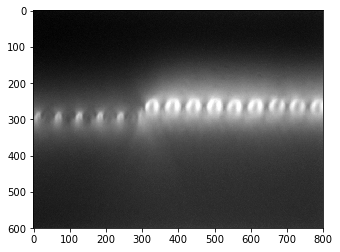

In [4]:
img = np.array(Image.open('/fhgfs/groups/e5/lhcb/detector/scifi/windingcontrol/Images_sorted/PosTrain/IMG11931.bmp'))

plt.imshow(img,cmap='gray')

plt.show()

In [5]:
print(img.shape)
x = img.shape[0]
y = img.shape[1]

(600, 800)


In [8]:
reshaped_img = reshape_grayscale_img(img=img)
img = reshaped_img[0]
input_shape = reshaped_img[1]

In [9]:
img.shape

(1, 600, 800, 1)

# Lets create a model with 1 Convolutional layer

In [109]:
num_kernel = 9
kernel_size = 100

In [110]:
model = Sequential()
model.add(Conv2D(num_kernel, (kernel_size, kernel_size), kernel_initializer='random_uniform', input_shape=input_shape, 
                 activation='relu'))

In [111]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 501, 701, 9)       90009     
Total params: 90,009.0
Trainable params: 90,009
Non-trainable params: 0.0
_________________________________________________________________


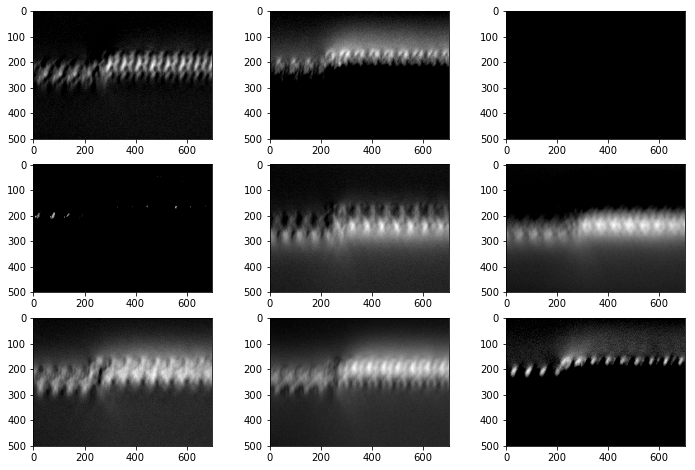

In [112]:
fig = visualize(model, img)
plt.savefig('../Plots/Conv2D_' + str(num_kernel) + str(kernel_size) + '_relu.png')

## Play around with Cat pic

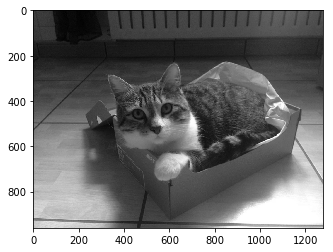

In [67]:
Kater = np.array(Image.open('../Cat.jpg').convert('L'))
plt.imshow(Kater, cmap='gray')

In [68]:
Kater_small = scipy.misc.imresize(Kater, (600,800))
#plt.imshow(Kater_small, cmap='gray')

In [69]:
Reshaped_Kater = reshape_grayscale_img(Kater_small)

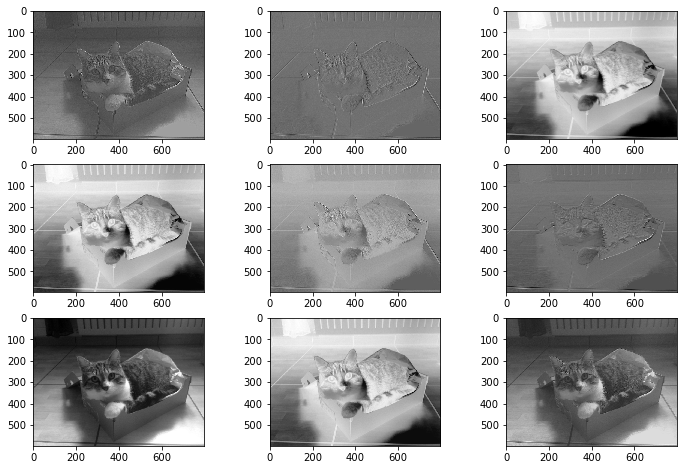

In [75]:
visualize(model, Reshaped_Kater[0])
plt.savefig('../Plots/Conv2D_' + str(num_kernel) + str(kernel_size) + '_Fynn.png', transparency=True)